## 1. Description of Dataset

The dataset contains records of 200+ financial indicators (obtained from SEC 10-K filings) of listed US companies from 2014 to 2018. These financial indicators span the range of revenue, operating costs and inventory growth, thus offering a holistic picture of each company's financial performance over time. 

In the original dataset, there are 22,077 observations that are linked to the financial performance of 4,980 companies over 5 years. The number of observations per year varies is slightly uneven, ranging from 3,808 observations in 2014 to 4,960 observations in 2017. 

The dataset has 223 features excluding two possible labels. Of these features, 2 are non-financial descriptors (`Company Ticker` and `Sector`), while the remaining 221 are financial indicators. 

Our data was preprocessed by concatenating the five years of data (originally split into 5 datasets), before cleaning the dataset to address missing data and outliers. 

## 2. Problems in Dataset

The two major problems in the original dataset are missing data and outliers.

### 2.1 Missing Data

Since we only have five years of financial data to work with, we decided to limit our analysis to companies with at least some data for each of the five years. Of the 4,980 companies, 3,726 were retained because they have data for all 5 years, while 1,254 companies were filtered out. This reduced the number of observations to 18,630. 

Subsequently, we proceeded to examine the proportion of missing values within feature columns. 2 features (`operatingCycle` and `cashConversionCycle`) have >99% of their values missing, while another 29 features have more than 20% of their values missing&mdash;these are too high to be fixed by data imputation. Hence, we drop 31 features with >20% of values missing, leaving us with 193 features. The missing value heatmaps below show how the amount of missing values (denoted in yellow) falls drastically after the high-missing-value features are removed. 

![Screen%20Shot%202021-10-31%20at%206.58.14%20PM.png](attachment:Screen%20Shot%202021-10-31%20at%206.58.14%20PM.png)

![Screen%20Shot%202021-10-31%20at%207.00.33%20PM.png](attachment:Screen%20Shot%202021-10-31%20at%207.00.33%20PM.png)

In the remaining feature columns, there were still some missing values. We proceeded to impute each missing value using the median value of the feature in the given sector (e.g. "Financial Services"). The reasoning for our sector-based approach is that financial indicators tend to be very sector-dependent. For instance, the median firm in "Healthcare" has a much higher `R&D Expenses` value than the median firm in "Basic Materials". 

### 2.2 Outliers

We realized that there were large differences between the 75th percentile and maximum values for some features (e.g. 0.172 at 75th percentile and 42138.664 at maximum for `Revenue Growth`), which suggested possible mistakes in data entry. 

Hence, lower and upper outliers were adjusted to take the values of the 5th or 95th percentile of values (respectively) for companies in the same sector.

After data cleaning was done, the dataset was left with 18,630 observations and 195 columns (including two output columns `Class` and `PRICE VAR [%]`). The distribution of `Class` in the cleaned dataset is slightly unbalanced, with 10,317 observations of 1 (increase in price) and 8,313 observations of 0 (decrease in price). 

## 3. Feature selection

### 3.1 categorical data

We have only two columns that contain categorical data: "Company Ticker" and "Sector".
<br>
<br> We found out that if we create one-hot encoding of "Company Ticker", we would have each entry a size 3726 vector. It would be too sparse and the company ticker doesn't really give out information about the company. So we decide to drop "Company Ticker" and only use "Sector" by converting it to one-hot vectors

### 3.2 numerical data

We have almost 200 columns of numerical features. We have to select a few of them to prevent overfitting and unwanted noise.
<br>
<br>
We calcuted the pearson correlation of each feature along with the class label "Class".

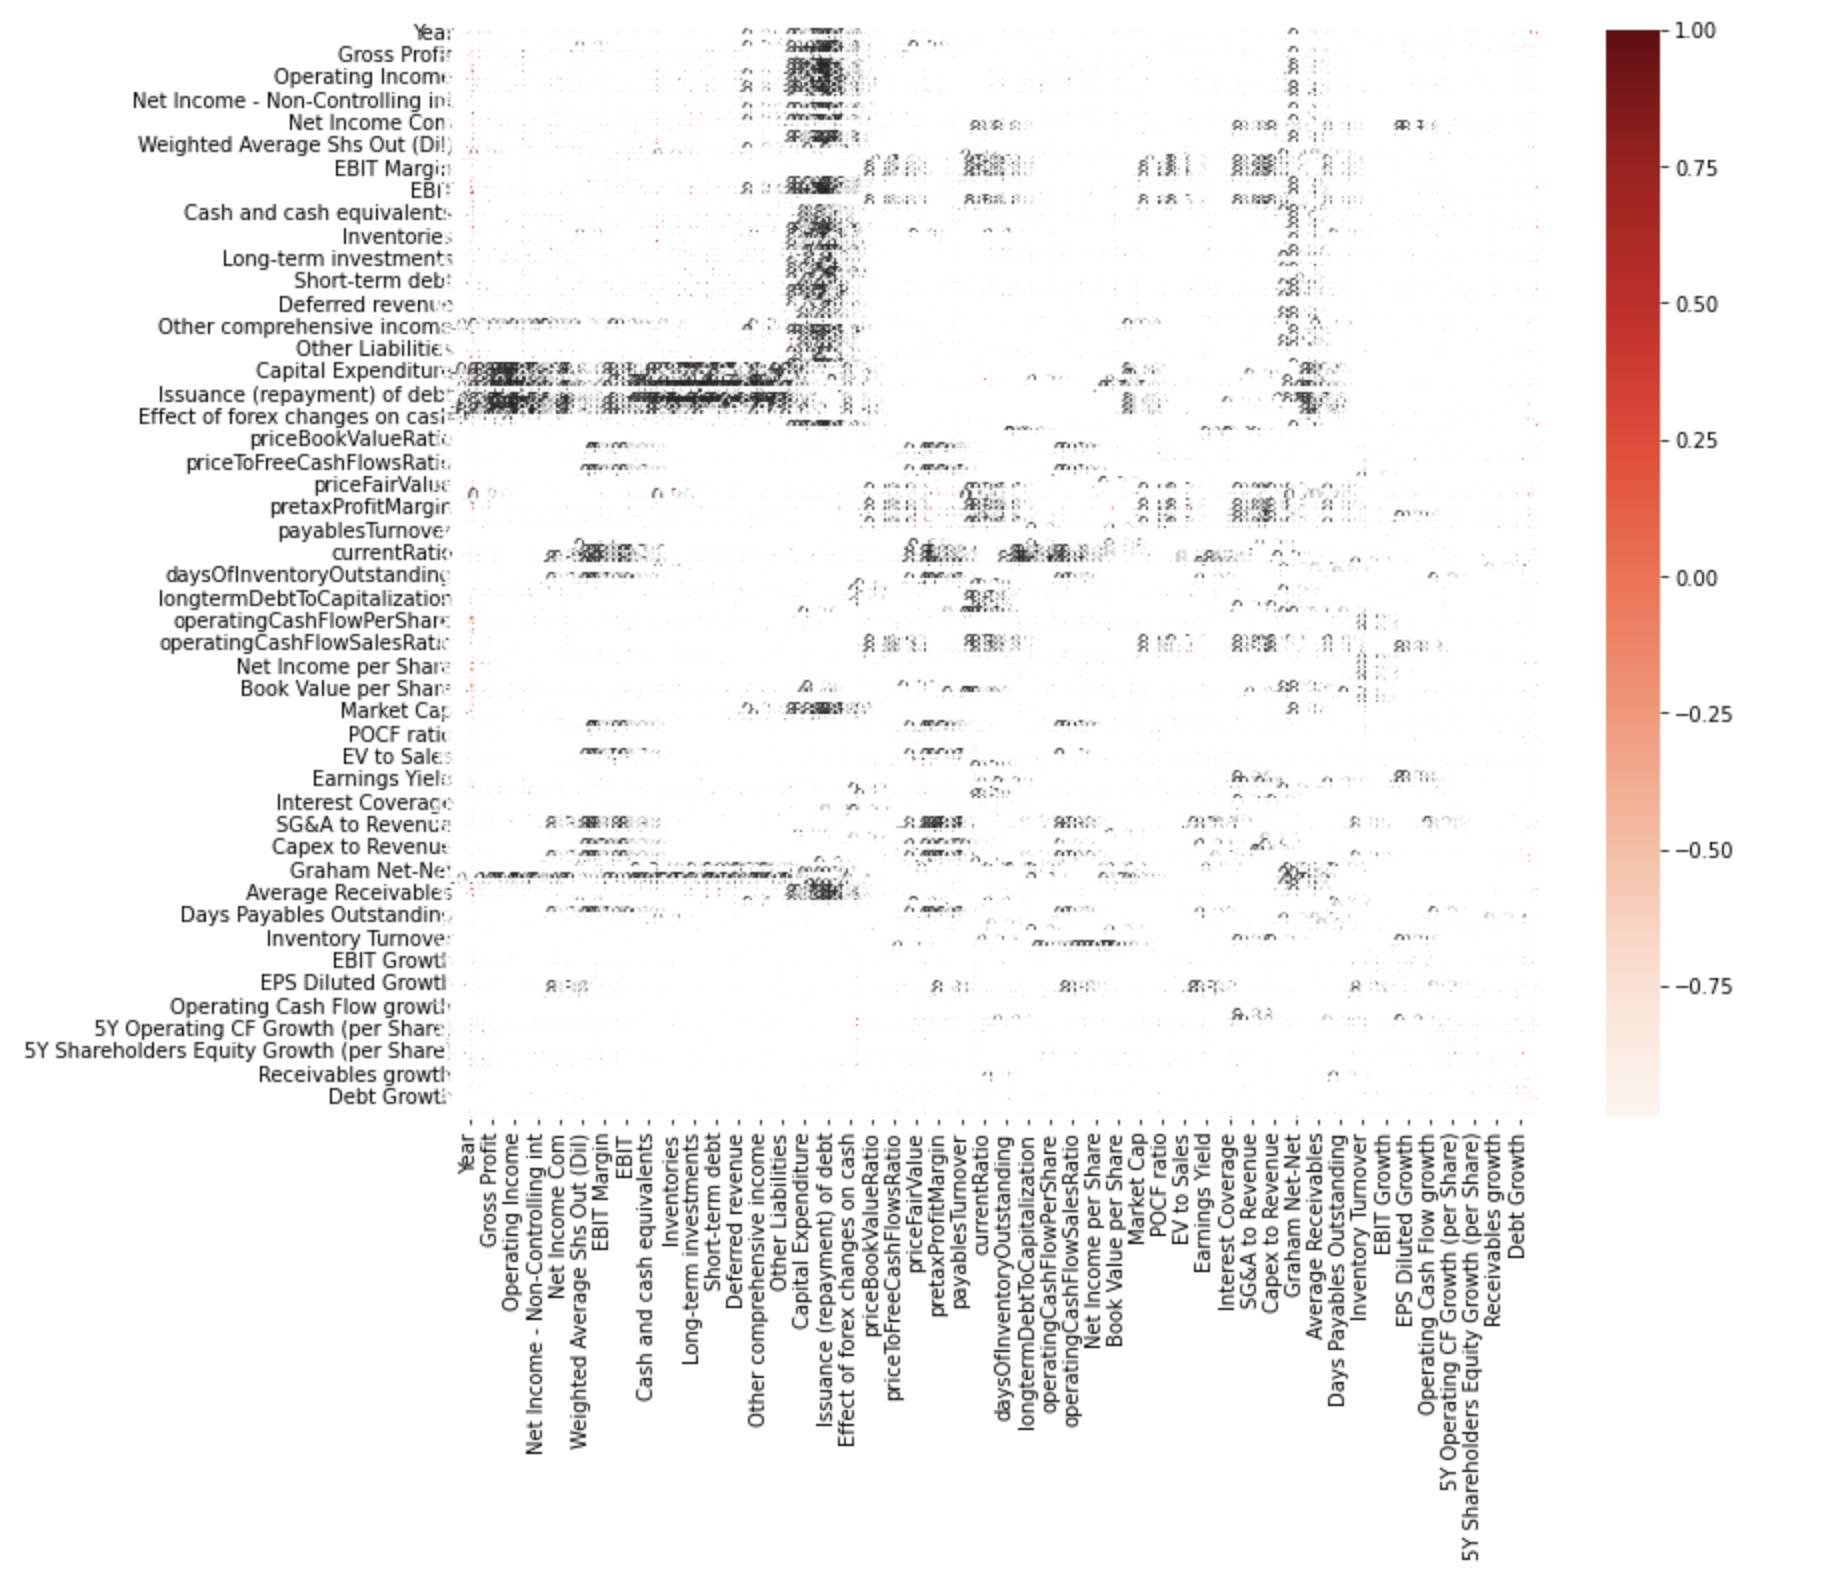

We then calcuted the correlation with respect to the label "Class" and filtered out features that are poorly correlated to the label by setting the threshold with value 0.08 of absolute value of correlation with respect to the label. And only 23 features are left

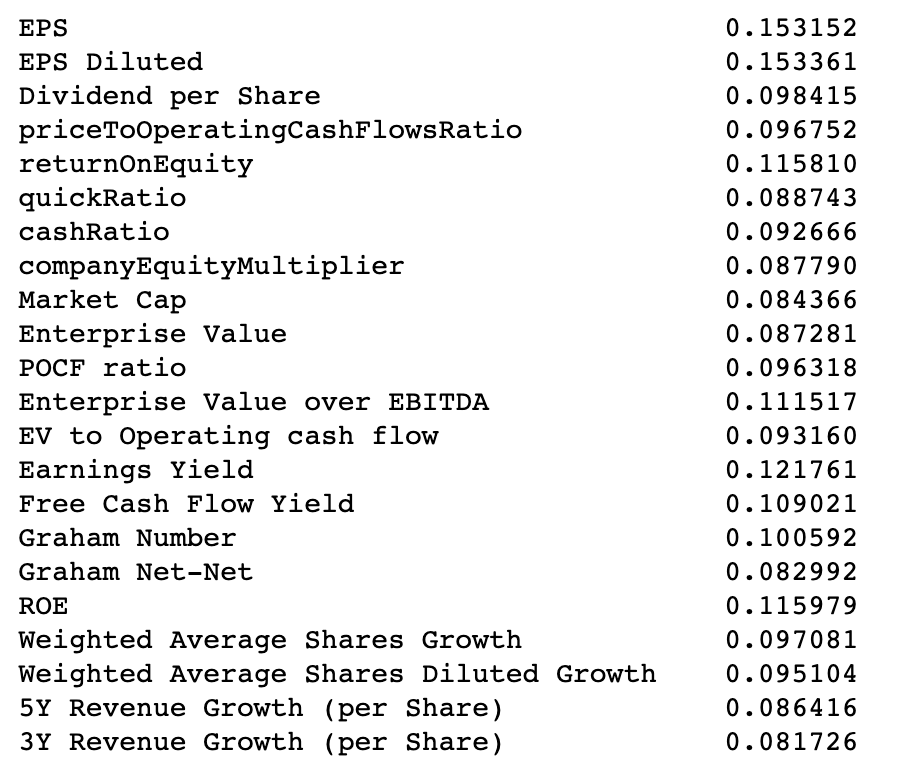

We then calcuted the correlation within each features also using pearson correlation.

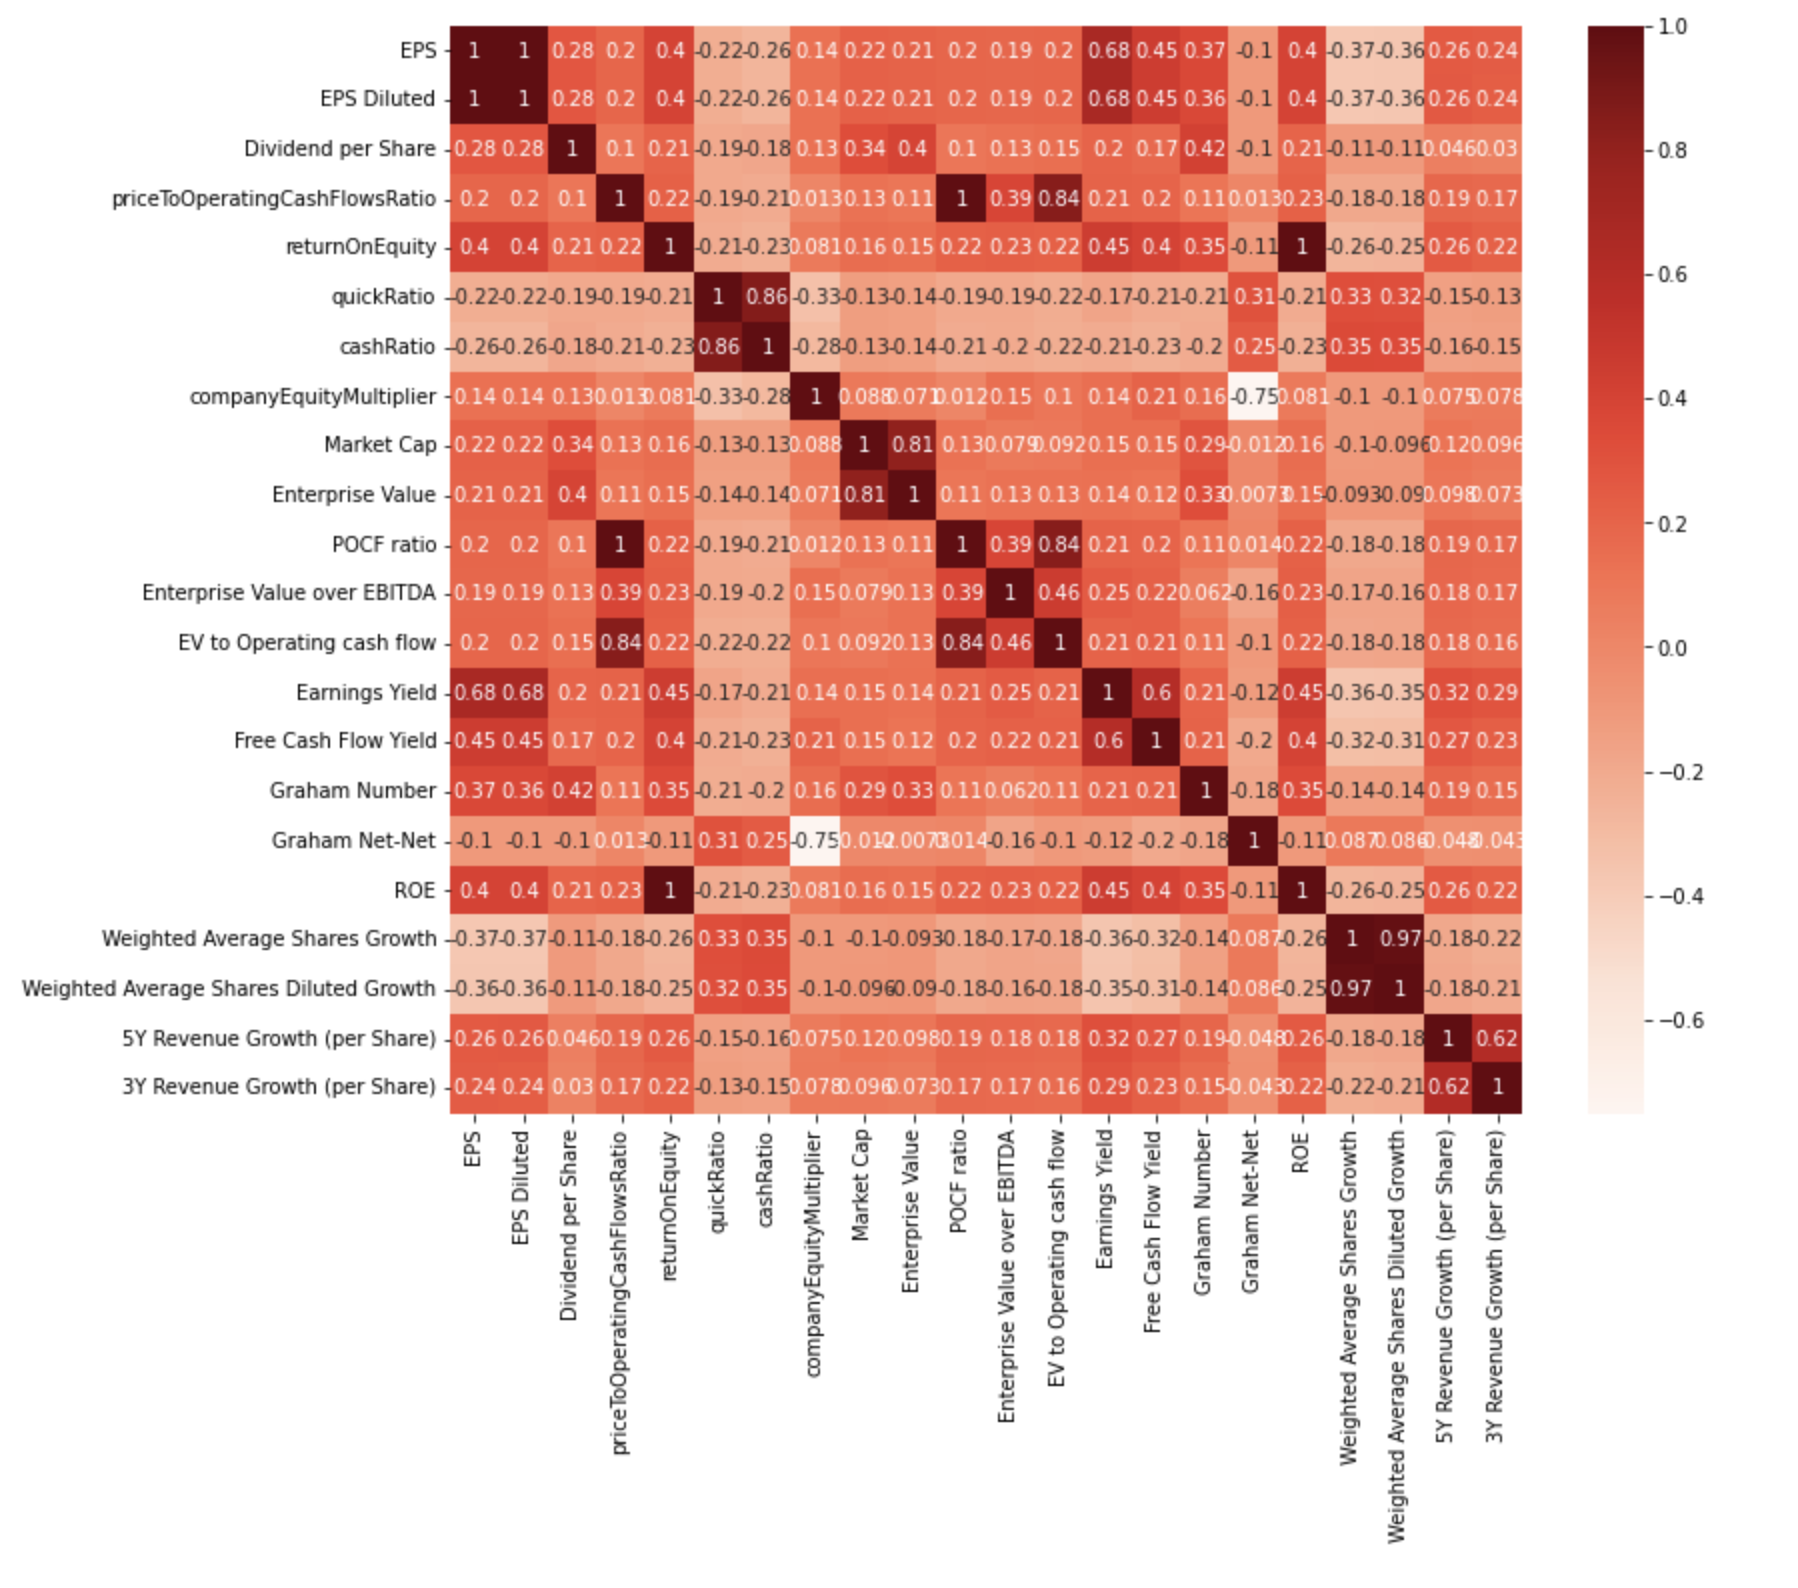

We found out that there are a couple of features are highly correlated(either positively or negatively) with each other. Those are: EPS and EPS Diluted; cashRatio and quickRatio; POCF ratio and priceToOperatingCashFlowsRatio; EV to Operating cash flow and priceToOperatingCashFlowsRatio; ROE and returnOnEquity; Graham Net-Net and companyEquityMultiplier; Enterprise Value and Market Cap; EV to Operating cash flow and POCF ratio; Weighted Average Shares Diluted Growth and Weighted Average Shares Growth.
<br>
<br>
Thus, we drop one of each pair: EPS Diluted, quickRatio, POCF ratio, priceToOperatingCashFlowsRatio,returnOnEquity,Enterprise Value, companyEquityMultiplier, Weighted Average Shares Diluted Growth.
<br>
<br>
And now we only have 14 features left: 'EPS', 'Dividend per Share', 
       'cashRatio', 'Market Cap',
      'Enterprise Value over EBITDA',
       'EV to Operating cash flow', 'Earnings Yield', 'Free Cash Flow Yield',
       'Graham Number', 'Graham Net-Net', 'ROE',
       'Weighted Average Shares Growth',
       '5Y Revenue Growth (per Share)', '3Y Revenue Growth (per Share)'

### 3.3 Normalization

We then normalize the numerical data by subtracting the mean of each feature and divided bt the standard deviation of each feature.